In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, ShuffleSplit, train_test_split
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from IPython.display import display

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
njobs = 4
randomState = 0

In [2]:
# Load preprocessed data
data = pd.read_csv("cleanData/data.csv")
y = pd.read_csv("cleanData/y.csv", header = None)
y = y[0]

In [4]:
# xgb.XGBClassifier
xgb = XGBClassifier()
train_sizes, train_scores, test_scores = learning_curve(estimator = xgb, 
                                                        X = data, 
                                                        y = y,
                                                        train_sizes = np.linspace(start = 0.1, stop = 1.0, num = 10), 
                                                        cv = ShuffleSplit(n_splits = 5, 
                                                                          test_size = 0.25, 
                                                                          random_state = randomState), 
                                                        n_jobs = njobs)

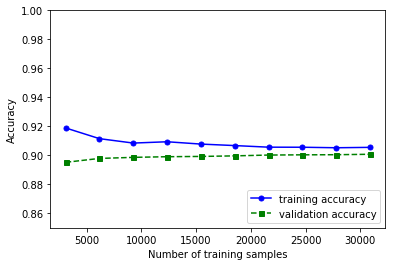

In [5]:
# Plot learning curve
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(train_sizes, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(train_sizes, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.85, 1.0])
plt.show()

In [6]:
print("Accuracy with full training : " + str(test_means[9]))

Accuracy with full training : 0.900728367486


In [7]:
# Plotting accuracy as a function of the model parameter max_depth 
param_range = [1, 2, 3, 4, 5, 10, 20]
train_scores, test_scores = validation_curve(estimator = xgb, 
                                             X = data, 
                                             y = y,
                                             param_name = "max_depth", 
                                             param_range = param_range, 
                                             cv = ShuffleSplit(n_splits = 5, 
                                                               test_size = 0.25, 
                                                               random_state = randomState), 
                                             n_jobs = njobs)

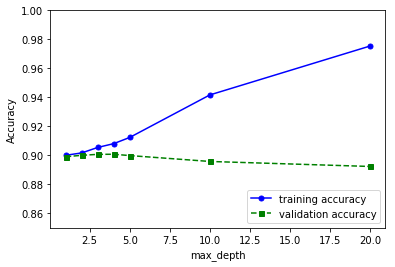

In [8]:
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(param_range, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(param_range, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.85, 1])
plt.show()

In [9]:
print(test_means)

[ 0.89909682  0.90006798  0.90072837  0.90080606  0.89989317  0.89583374
  0.89237642]


In [10]:
print("We will use max_depth = 4")

We will use max_depth = 4


In [12]:
# Plotting accuracy as a function of the model parameter learning_rate
xgb = XGBClassifier(max_depth = 4)
param_range = [0.1, 0.2, 0.4, 0.6, 0.8, 1]
train_scores, test_scores = validation_curve(estimator = xgb, 
                                             X = data, 
                                             y = y,
                                             param_name = "learning_rate", 
                                             param_range = param_range, 
                                             cv = ShuffleSplit(n_splits = 5, 
                                                               test_size = 0.25, 
                                                               random_state = randomState), 
                                             n_jobs = njobs)

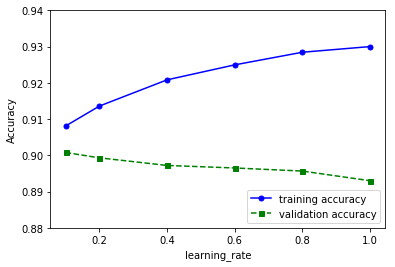

In [13]:
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(param_range, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(param_range, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xlabel("learning_rate")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.88, 0.94])
plt.show()

In [14]:
print(test_means)

[ 0.90080606  0.8993299   0.8972322   0.89653297  0.89567835  0.89301738]


In [15]:
print("We will use learning_rate = 0.1")

We will use learning_rate = 0.1


In [16]:
# Plotting accuracy as a function of the model parameter n_estimators 
xgb = XGBClassifier(max_depth=4,
                         learning_rate=0.1)
param_range = [10, 30, 100, 300, 1000]
train_scores, test_scores = validation_curve(estimator = xgb, 
                                             X = data, 
                                             y = y,
                                             param_name = "n_estimators", 
                                             param_range = param_range, 
                                             cv = ShuffleSplit(n_splits = 5, 
                                                               test_size = 0.25, 
                                                               random_state = randomState), 
                                             n_jobs = njobs)

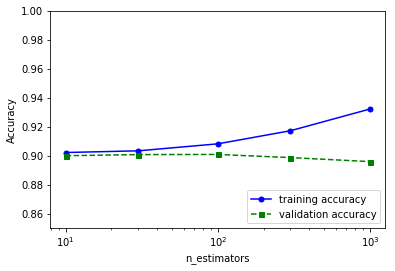

In [17]:
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(param_range, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(param_range, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xscale("log")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.85, 1])
plt.show()

In [18]:
print(test_means)

[ 0.89993202  0.90070894  0.90080606  0.89863067  0.89587258]


In [19]:
print("We will use n_estimators = 100")

We will use n_estimators = 100


In [20]:
# Final model score
# Let's get validation accuracy with updated parameters
xgb = XGBClassifier(max_depth=4,
                          learning_rate=0.1,
                          n_estimators = 100)
scores = cross_val_score(estimator = xgb, 
                         X = data, 
                         y = y, 
                         cv = ShuffleSplit(n_splits = 5, 
                                           test_size = 0.25, 
                                           random_state = randomState), 
                         n_jobs = njobs)
print("Accuracy : " + str(np.mean(scores)))

Accuracy : 0.900806060017


In [3]:
# low-level API

x_train, x_valid, y_train, y_valid = train_test_split(data, y, test_size=0.25, random_state=6)

d_train = xgboost.DMatrix(x_train, label=y_train)
d_valid = xgboost.DMatrix(x_valid, label=y_valid)

params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 10

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
xgb = xgboost.train(params, d_train, 500, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.678982	valid-logloss:0.679396
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.563461	valid-logloss:0.567456
[20]	train-logloss:0.481594	valid-logloss:0.489164
[30]	train-logloss:0.421663	valid-logloss:0.432762
[40]	train-logloss:0.376998	valid-logloss:0.391463
[50]	train-logloss:0.342929	valid-logloss:0.360836
[60]	train-logloss:0.316741	valid-logloss:0.33784
[70]	train-logloss:0.296405	valid-logloss:0.320825
[80]	train-logloss:0.280562	valid-logloss:0.308265
[90]	train-logloss:0.268094	valid-logloss:0.298879
[100]	train-logloss:0.258233	valid-logloss:0.292109
[110]	train-logloss:0.249877	valid-logloss:0.287253
[120]	train-logloss:0.242752	valid-logloss:0.283871
[130]	train-logloss:0.236786	valid-logloss:0.281414
[140]	train-logloss:0.231646	valid-logloss:0.279734
[150]	train-logloss:0.227398	valid-logloss:0.278568
[160]	train-logloss:0.223531	

In [4]:
y_preds_train = xgb.predict(d_train)
y_preds_valid = xgb.predict(d_valid)

In [5]:
def computePreds(preds, cutoff) :
    preds[preds > cutoff] = 1
    preds[preds <= cutoff] = 0
    return(preds)

In [6]:
print("Training set 0.5 threshold accuracy: " + str(accuracy_score(y_train, computePreds(y_preds_train, 0.5))))

Training set 0.5 threshold accuracy: 0.932472241106


In [7]:
print("Validation set 0.5 threshold accuracy: " + str(accuracy_score(y_valid, computePreds(y_preds_valid, 0.5))))

Validation set 0.5 threshold accuracy: 0.895503544722
